# Mushroom SVM classification


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv('../KNN/Data-Mushroom/mushrooms.csv', skiprows=2)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data exploration

In [3]:
print(len(df.columns))
y_column = 'class'
x_columns = [col for col in df.columns if df.nunique()[col] > 2]
print(len(x_columns))
df[x_columns].head()

23
16


,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,p,k,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,a,k,c,s,s,w,w,w,o,p,n,n,g
2,b,s,w,l,n,c,s,s,w,w,w,o,p,n,n,m
3,x,y,w,p,n,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,n,k,e,s,s,w,w,w,o,e,n,a,g


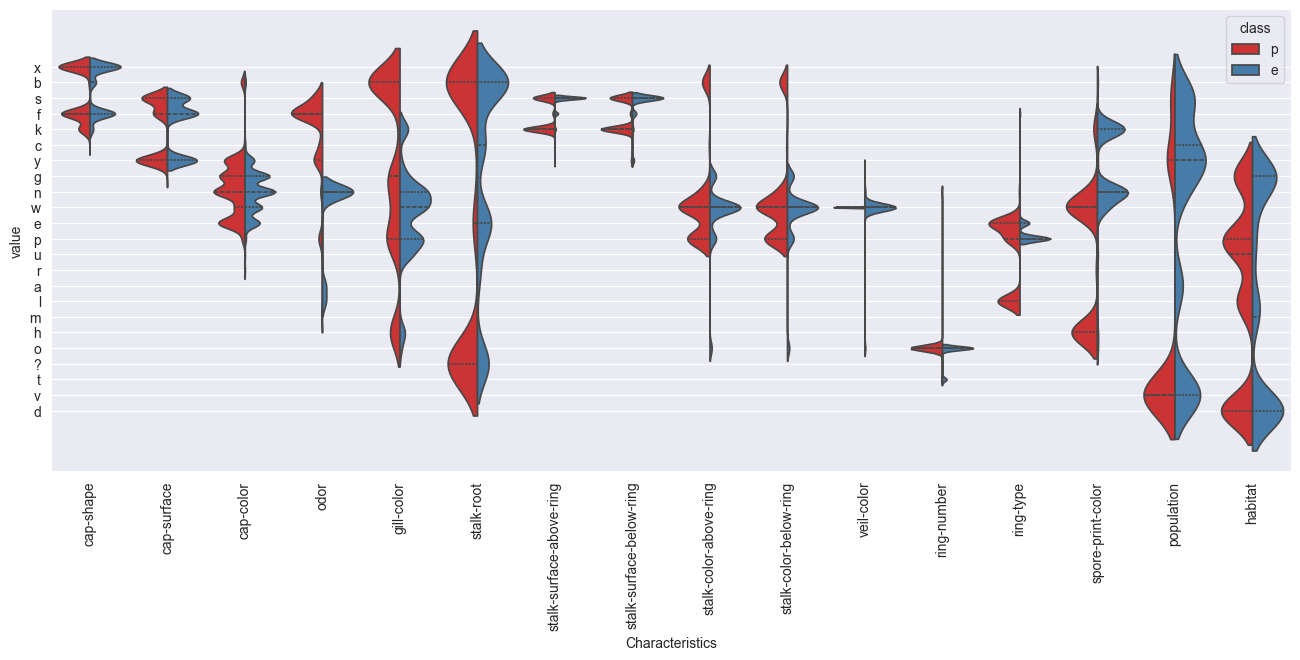

In [4]:
df_div = pd.melt(df[x_columns + [y_column]], "class", var_name="Characteristics")

fig, ax = plt.subplots(figsize=(16, 6))

p = sns.violinplot(ax=ax, x="Characteristics", y="value", hue="class", split=True, data=df_div, inner='quartile',
                   palette='Set1', density_norm='count')
tick_locations = ax.get_xticks()

# Set the tick locations explicitly
ax.set_xticks(tick_locations)

# Now set the tick labels with rotation
ax.set_xticklabels(list(x_columns), rotation=90)

plt.show()

## Data preprocessing

In [5]:
label_encoder = LabelEncoder()
X = df[x_columns].apply(label_encoder.fit_transform)

## Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, df[y_column], test_size=0.2)

In [7]:
# params = {'C': [0.001, 0.1, 1, 10, 100],
#           'gamma': [0.1, 0.01, 0.001],
#           'kernel': ['linear', 'rbf', 'poly']}
params = {'C': [0.001, 0.1],
          'gamma': [0.1, 0.01, 0.001],
          'kernel': ['linear', 'rbf', 'poly']}

svc_model = SVC()
grid_search__model = GridSearchCV(svc_model, param_grid=params, cv=10, scoring='accuracy')
grid_search_score = grid_search__model.fit(X_train, y_train)
# pd.DataFrame(grid_search__model.cv_results_).transpose()

In [8]:
results = pd.DataFrame(grid_search__model.cv_results_)
results = results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score']]

In [9]:
results.head()

,param_C,param_gamma,param_kernel,mean_test_score
0,0.001,0.10,linear,0.887216
1,0.001,0.10,rbf,0.519003
2,0.001,0.10,poly,0.996000
3,0.001,0.01,linear,0.887216
4,0.001,0.01,rbf,0.733038


In [10]:
linear_results = results[results['param_kernel'] == 'linear']
rbf_results = results[results['param_kernel'] == 'rbf']
poly_results = results[results['param_kernel'] == 'poly']

<Axes: xlabel='param_C', ylabel='mean_test_score'>

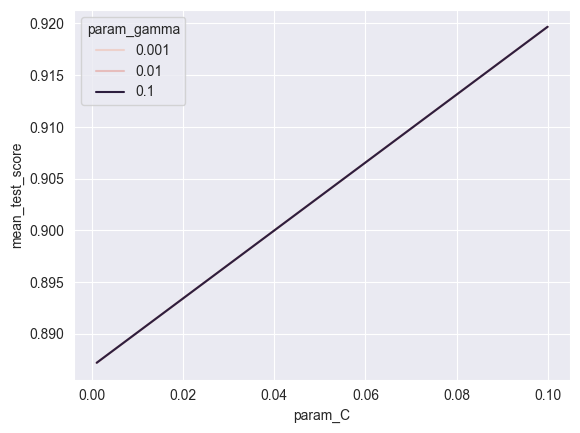

In [41]:
sns.lineplot(data=linear_results, x='param_C', y='mean_test_score', hue='param_gamma')

In [12]:
rbf_results

,param_C,param_gamma,param_kernel,mean_test_score
1,0.001,0.100,rbf,0.519003
4,0.001,0.010,rbf,0.733038
7,0.001,0.001,rbf,0.519003
10,0.100,0.100,rbf,0.992614
13,0.100,0.010,rbf,0.944147
16,0.100,0.001,rbf,0.877521


<Axes: xlabel='param_C', ylabel='mean_test_score'>

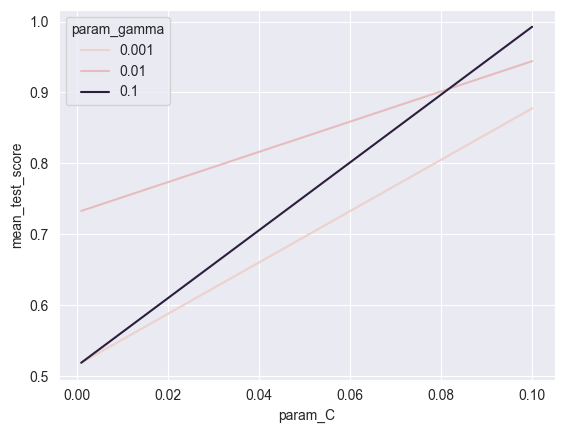

In [13]:
sns.lineplot(data=rbf_results, x='param_C', y='mean_test_score', hue='param_gamma')

<Axes: xlabel='param_C', ylabel='mean_test_score'>

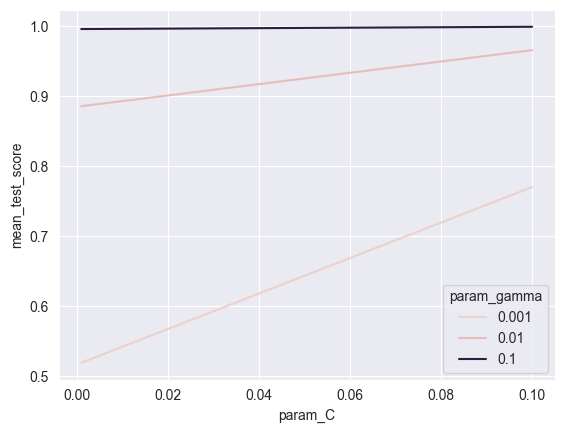

In [14]:
sns.lineplot(data=poly_results, x='param_C', y='mean_test_score', hue='param_gamma')

In [18]:
best_estimator = grid_search__model.best_estimator_
best_estimator

SVC(C=0.1, gamma=0.1, kernel='poly')

## Evaluate the model

In [23]:
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       835
           p       1.00      1.00      1.00       790

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



([<matplotlib.axis.YTick at 0x14972de90>,
 [Text(0, 0.5, 'Edible'), Text(0, 1.5, 'Poisonous')])

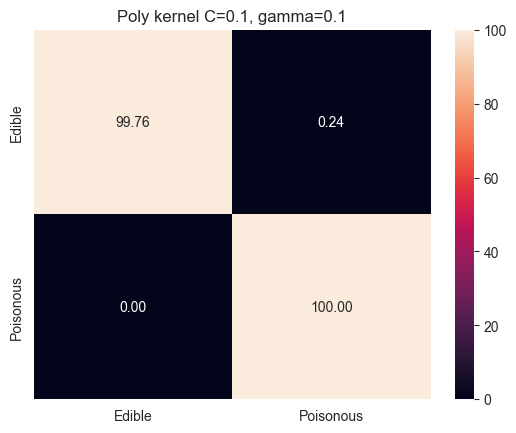

In [40]:
results = confusion_matrix(y_test, y_pred)
results = results / results.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(results, annot=True, fmt=".2f")
plt.title('Poly kernel C=0.1, gamma=0.1')
plt.xticks([0.5, 1.5], ['Edible', 'Poisonous'])
plt.yticks([0.5, 1.5], ['Edible', 'Poisonous'])